In [1]:
# Imports basics
import os
import numpy as np
import h5py
import json
#import setGPU
import sklearn
#import corner
import scipy
import time
from tqdm import tqdm 
#import utils #import *
import sys
import glob
#import models
#import losses
# Imports neural net tools
import itertools
import torch
import torch.nn as nn
from torch.autograd.variable import *
import torch.optim as optim
import torch.nn.functional as F
#from fast_soft_sort.pytorch_ops import soft_rank
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score,  auc

from sklearn.preprocessing import OneHotEncoder
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
np.random.seed(42)


In [7]:
a = torch.rand(10,100,15)
b = torch.rand(10,5,14)

torch.Size([10, 105])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
x = np.random.randn(100)
y = np.random.randn(100)
labels = np.random.randint(4, size=100)

# Create a scatter plot
scatter = plt.scatter(x, y, c=labels, cmap='viridis',alpha = 0.05)

# Create proxy artists for the legend
legend_elements = [plt.Line2D([0], [0], linestyle='-', color=scatter.cmap(scatter.norm(0)), label='Label 0'),
                   plt.Line2D([0], [0], linestyle='-', color=scatter.cmap(scatter.norm(1)), label='Label 1'),
                   plt.Line2D([0], [0], linestyle='-', color=scatter.cmap(scatter.norm(2)), label='Label 2'),
                   plt.Line2D([0], [0], linestyle='-', color=scatter.cmap(scatter.norm(3)), label='Label 3')]

# Create the legend
plt.legend(handles=legend_elements)

# Show the plot
plt.show()


# Hyperbolic embeddings

In [19]:
import sys
sys.path.append('HypJets')

from HypJets.hyptorch import nn as hypnn
from HypJets.hyptorch import pmath

In [32]:
mp = hypnn.ToPoincare(0.2)

In [43]:
x = torch.rand(50,1,20)
y = torch.randint(4,[50])

In [49]:
forward2(mp(x),y)

tensor(6.5931)

In [46]:
features = mp(x)
labels = y
mask=None
batch_size = features.shape[0]
if labels is not None and mask is not None:
    raise ValueError('Cannot define both `labels` and `mask`')
elif labels is None and mask is None:
    mask = torch.eye(batch_size, dtype=torch.float32).to(device)
elif labels is not None:
    labels = labels.contiguous().view(-1, 1)
    if labels.shape[0] != batch_size:
        raise ValueError('Num of labels does not match num of features')
    mask = torch.eq(labels, labels.T).float().to(device)
else:
    mask = mask.float().to(device)

contrast_count = features.shape[1]
contrast_feature = torch.cat(torch.unbind(features, dim=1), dim=0)

anchor_feature = contrast_feature
anchor_count = contrast_count

In [10]:
import torch.nn.functional as F

In [29]:
def Hyperbolic_contrastive_loss(x_i, x_j, temperature=0.1,c = 0.2):
    xdevice = 'cpu'
    batch_size = x_i.shape[0]
    z_i = F.normalize( x_i, dim=1 )
    z_j = F.normalize( x_j, dim=1 )
    z.unsqueeze(1), z.unsqueeze(0)
    similarity_matrix = torch.squeeze(pmath.mobius_matvec(z.unsqueeze(1), z.unsqueeze(0),c=c),dim=2)
    sim_ij = torch.diag( similarity_matrix,  batch_size )
    sim_ji = torch.diag( similarity_matrix, -batch_size )
    positives = torch.cat( [sim_ij, sim_ji], dim=0 )
    nominator = torch.exp( positives / temperature )
    negatives_mask = ( ~torch.eye( 2*batch_size, 2*batch_size, dtype=bool ) ).float()
    negatives_mask = negatives_mask.to( xdevice )
    denominator = negatives_mask * torch.exp( similarity_matrix / temperature )
    #print(nominator, denominator)
    loss_partial = -torch.log( nominator / torch.sum( denominator, dim=1 ) )
    loss = torch.sum( loss_partial )/( 2*batch_size )
    return loss

In [15]:
x_i = input1
x_j = input2
temperature=0.1

In [17]:
batch_size = x_i.shape[0]
z_i = F.normalize( x_i, dim=1 )
z_j = F.normalize( x_j, dim=1 )
z   = torch.cat( [z_i, z_j], dim=0 )

torch.Size([200, 200])

In [24]:
 F.cosine_similarity( z.unsqueeze(1), z.unsqueeze(0), dim=2 ).shape

torch.Size([200, 200])

In [1]:
import torch

In [4]:
import sys
sys.path.append('HypJets')

from HypJets.hyptorch import nn as hypnn
from HypJets.hyptorch import pmath

In [30]:
Hyperbolic_contrastive_loss(input1,input2)

tensor(10.4789)

In [6]:
input1 = torch.randn(100, 128)
input2 = torch.randn(100, 128)
output = torch.nn.functional.cosine_similarity(input1, input2)
print(output)

tensor([ 0.0417, -0.0250, -0.1302, -0.1460, -0.0858,  0.0832, -0.0261,  0.0836,
        -0.0109,  0.0150, -0.1221,  0.0255,  0.0452,  0.0030,  0.0408, -0.0168,
        -0.0708, -0.1193,  0.1164,  0.0592,  0.1107,  0.0976,  0.1572, -0.0515,
        -0.1664,  0.1130,  0.0383, -0.0172,  0.0517,  0.0949,  0.1564,  0.0536,
         0.0508,  0.0100,  0.0284, -0.0925,  0.0352, -0.0058, -0.0155,  0.1806,
         0.0728,  0.0032, -0.0537, -0.0646,  0.0733,  0.1615,  0.0544,  0.0318,
         0.0183,  0.1876,  0.0349, -0.1079,  0.0714,  0.0547, -0.0503,  0.0089,
        -0.0221, -0.0229,  0.0838,  0.1339, -0.0077,  0.0070, -0.0184,  0.0141,
         0.0525, -0.0807, -0.0347,  0.0439, -0.1336, -0.0606,  0.0702, -0.0113,
         0.0565,  0.0712,  0.1531,  0.0117, -0.0358, -0.1421, -0.1513,  0.1726,
         0.0212,  0.0261,  0.0179, -0.0297, -0.0119, -0.0752,  0.0075,  0.1383,
        -0.1609, -0.1490,  0.0865, -0.2060, -0.0911, -0.0882, -0.1624,  0.1252,
        -0.1989, -0.1241, -0.0356, -0.02

In [3]:
# compute logits
anchor_dot_contrast = torch.div(
    pmath.mobius_matvec(anchor_feature, contrast_feature,c=0.2),
    0.1)

NameError: name 'pmath' is not defined

In [58]:
# for numerical stability
logits_max, _ = torch.max(anchor_dot_contrast, dim=1, keepdim=True)
logits = anchor_dot_contrast - logits_max.detach()

# tile mask
mask = mask.repeat(anchor_count, contrast_count)
# mask-out self-contrast cases
logits_mask = torch.scatter(
    torch.ones_like(mask),
    1,
    torch.arange(batch_size * anchor_count).view(-1, 1).to(device),
    0
)
mask = mask * logits_mask

# compute log_prob
exp_logits = torch.exp(logits) * logits_mask
log_prob = logits - torch.log(exp_logits.sum(1, keepdim=True))

# compute mean of log-likelihood over positive
mean_log_prob_pos = (mask * log_prob).sum(1) / mask.sum(1)
#print((mask*log_prob).sum(1))
# loss
loss = - (0.1 / 0.1) * mean_log_prob_pos
loss = loss.view(anchor_count, batch_size).mean()

In [47]:
def forward2(features, labels=None, mask=None):
        """Compute loss for model. If both `labels` and `mask` are None,
        it degenerates to SimCLR unsupervised loss:
        https://arxiv.org/pdf/2002.05709.pdf
        Args:
            features: hidden vector of shape [bsz, n_views, ...].
            labels: ground truth of shape [bsz].
            mask: contrastive mask of shape [bsz, bsz], mask_{i,j}=1 if sample j
                has the same class as sample i. Can be asymmetric.
        Returns:
            A loss scalar.
        """
        device = (torch.device('cuda')
                  if features.is_cuda
                  else torch.device('cpu'))

        if len(features.shape) < 3:
            raise ValueError('`features` needs to be [bsz, n_views, ...],'
                             'at least 3 dimensions are required')
        if len(features.shape) > 3:
            features = features.view(features.shape[0], features.shape[1], -1)

        batch_size = features.shape[0]
        if labels is not None and mask is not None:
            raise ValueError('Cannot define both `labels` and `mask`')
        elif labels is None and mask is None:
            mask = torch.eye(batch_size, dtype=torch.float32).to(device)
        elif labels is not None:
            labels = labels.contiguous().view(-1, 1)
            if labels.shape[0] != batch_size:
                raise ValueError('Num of labels does not match num of features')
            mask = torch.eq(labels, labels.T).float().to(device)
        else:
            mask = mask.float().to(device)

        contrast_count = features.shape[1]
        contrast_feature = torch.cat(torch.unbind(features, dim=1), dim=0)
        
        anchor_feature = contrast_feature
        anchor_count = contrast_count
        

        # compute logits
        anchor_dot_contrast = torch.div(
            torch.matmul(anchor_feature, contrast_feature.T),
            0.1)
        
        # for numerical stability
        logits_max, _ = torch.max(anchor_dot_contrast, dim=1, keepdim=True)
        logits = anchor_dot_contrast - logits_max.detach()
        
        # tile mask
        mask = mask.repeat(anchor_count, contrast_count)
        # mask-out self-contrast cases
        logits_mask = torch.scatter(
            torch.ones_like(mask),
            1,
            torch.arange(batch_size * anchor_count).view(-1, 1).to(device),
            0
        )
        mask = mask * logits_mask

        # compute log_prob
        exp_logits = torch.exp(logits) * logits_mask
        log_prob = logits - torch.log(exp_logits.sum(1, keepdim=True))
        
        # compute mean of log-likelihood over positive
        mean_log_prob_pos = (mask * log_prob).sum(1) / mask.sum(1)
        #print((mask*log_prob).sum(1))
        # loss
        loss = - (0.1 / 0.1) * mean_log_prob_pos
        loss = loss.view(anchor_count, batch_size).mean()
        return loss

In [ ]:
# -*- coding: utf-8 -*-
"""Demo to overlay multiple corners on top of each other"""
import corner
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np

CORNER_KWARGS = dict(
    smooth=0.9,
    label_kwargs=dict(fontsize=16),
    title_kwargs=dict(fontsize=16),
    quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
    plot_density=False,
    plot_datapoints=False,
    fill_contours=True,
    show_titles=True,
    max_n_ticks=3,
)


def overlaid_corner(samples_list, sample_labels):
    """Plots multiple corners on top of each other"""
    # get some constants
    n = len(samples_list)
    _, ndim = samples_list[0].shape
    max_len = max([len(s) for s in samples_list])
    cmap = plt.cm.get_cmap('gist_rainbow', n)
    colors = [cmap(i) for i in range(n)]

    plot_range = []
    for dim in range(ndim):
        plot_range.append(
            [
                min([min(samples_list[i].T[dim]) for i in range(n)]),
                max([max(samples_list[i].T[dim]) for i in range(n)]),
            ]
        )

    CORNER_KWARGS.update(range=plot_range)

    fig = corner.corner(
        samples_list[0],
        color=colors[0],
        **CORNER_KWARGS
    )

    for idx in range(1, n):
        fig = corner.corner(
            samples_list[idx],
            fig=fig,
            weights=get_normalisation_weight(len(samples_list[idx]), max_len),
            color=colors[idx],
            **CORNER_KWARGS
        )

    plt.legend(
        handles=[
            mlines.Line2D([], [], color=colors[i], label=sample_labels[i])
            for i in range(n)
        ],
        fontsize=20, frameon=False,
        bbox_to_anchor=(1, ndim), loc="upper right"
    )
    plt.plot()
#     plt.savefig("corner.png")
#     plt.close()


def get_normalisation_weight(len_current_samples, len_of_longest_samples):
    return np.ones(len_current_samples) * (len_of_longest_samples / len_current_samples)


def main():
    ndim, nsamples = 3, 10000
    samples = np.random.randn(ndim * nsamples).reshape([nsamples, ndim])

    overlaid_corner(
        [samples * 3, samples * 2, samples],
        ["samples x 3", "samples x 2", "samples"]
    )





In [2]:
a = torch.load('100k_jet_f')
b = torch.load('100k_l')
c = torch.load('100k_x_sv')
d = torch.load('100k_x_pf')

In [45]:
# QCD_mask = torch.all(b==torch.tensor([0., 0., 0., 1.]),dim=1)

In [211]:
qcd_pt = a[:,0]
qcd_min,qcd_max = qcd_pt.min(),qcd_pt.max()
adj_min = qcd_min-qcd_min % 50 
adj_max = qcd_max+(50-qcd_max %50)
bins =np.linspace(adj_min,adj_max ,int((adj_max-adj_min)/50)+1)
counts, bins = np.histogram(qcd_pt, bins = bins)
weights = np.max(counts)/counts
for i in range(len(weights)):
        if weights[i] < 0.2:
            weights[i] = 0.2
        elif weights[i] > 10:
            weights[i] = 10
def get_weight(val,weight,adj_min):
    return weight[int((val-adj_min - (val % 50))/50)]

In [213]:
qcd_pt = a[:,0]
qcd_min,qcd_max = qcd_pt.min(),qcd_pt.max()
adj_min = qcd_min-qcd_min % 50 
adj_max = qcd_max+(50-qcd_max %50)
bins =np.linspace(adj_min,adj_max ,int((adj_max-adj_min)/50)+1)
counts, bins = np.histogram(qcd_pt, bins = bins)
weights = np.max(counts)/counts
for i in range(len(weights)):
        if weights[i] < 0.2:
            weights[i] = 0.2
        elif weights[i] > 10:
            weights[i] = 10

# QCD_mask = torch.all(b==torch.tensor([0., 0., 0., 1.]),dim=1)
def get_weight(val,weight,adj_min):
    return weight[int((val-adj_min - (val % 50))/50)]
def get_scaling_weights(label, data, weights,adj_min):
    QCD_mask = torch.all(label == torch.tensor([0., 0., 0., 1.]), dim=1)
    scaling_weights = torch.ones(data.size(0))  # Initialize all weights as 1
    
    for i in range(data.size(0)):
      
        scaling_weights[i] = get_weight(data[i], weights,adj_min)
    
    return scaling_weights

In [214]:
scaling = get_scaling_weights(b,a[:,0],weights,adj_min)

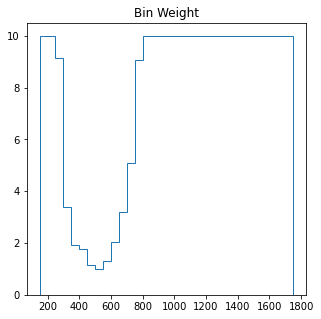

In [220]:
plt.figure(figsize=(5,5))
plt.title('Bin Weight')
plt.stairs(weights,bins)
plt.show()

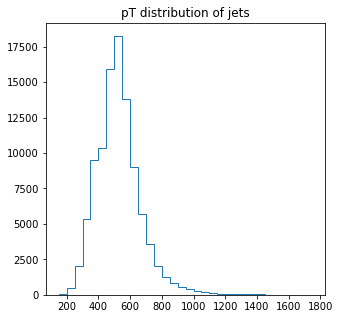

In [219]:
plt.figure(figsize = (5,5))
plt.title('pT distribution of jets')
plt.stairs(counts, bins)
plt.show()

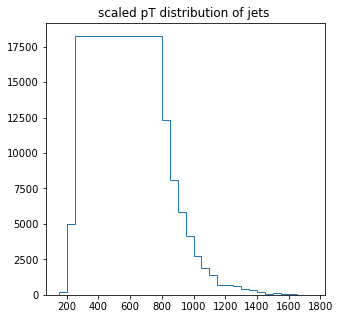

In [218]:
plt.figure(figsize = (5,5))
plt.title('scaled pT distribution of jets ')
plt.stairs(counts*weights, bins)
plt.show()

# SIMCLR Loss Testing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate random N-dimensional binary-labeled data
N = 1000  # Number of instances
D = 10  # Number of dimensions
labels = np.random.randint(0, 2, N)  # Binary labels
data = np.random.randn(N, D)  # Random N-dimensional data

# Apply PCA to reduce dimensionality to 2 for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Separate data points based on labels
data_label0 = data_pca[labels == 0]
data_label1 = data_pca[labels == 1]

# Create the PCA plot
plt.scatter(data_label0[:, 0], data_label0[:, 1], label='Label 0')
plt.scatter(data_label1[:, 0], data_label1[:, 1], label='Label 1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.legend()
plt.show()


In [629]:
ipath = '/n/holyscratch01/iaifi_lab/jkrupa/4Jul23_v0/train/raw/'

In [1]:
import dataset_loader
import importlib
importlib.reload(dataset_loader)
data_train = dataset_loader.zpr_loader(ipath,maxfiles=3) 
# data_val = dataset_loader.zpr_loader(vpath,maxfiles=10)

NameError: name 'ipath' is not defined

In [ ]:
dt = data_train[0:100000]

In [ ]:
x_pf = dt[0]
x_sv = dt[1]
jet_f = dt[2]
l = dt[3]

In [ ]:
torch.save(jet_f,'100k_jet_f')
torch.save(l,'100k_l')
torch.save(x_sv,'100k_x_sv')
torch.save(x_pf,'100k_x_pf')

pt, pt/ptjet, eta, eta-etajet, phi, phi-phijet, d0 (impact parameter in xy direction), dz (impact parameter in z direction)
and then the last 5 are just one-hot-encoded labels

In [ ]:
plt.hist(x_pf[:,:,0])
plt.title("total pt distribution")

## Pretraining Jet Matching

In [ ]:
loader = gen_matched_data(data_train, 2000)

In [ ]:
loader = gen_matched_simple_data(data_train, 2000)

In [ ]:
for istep, (matched_x_pf, matched_x_sv, matched_jet_features, matching_label) in enumerate(tqdm(loader)):
    print(matched_x_pf.size(), matched_x_sv.size(), matched_jet_features.size(), matching_label.size())
    break

In [ ]:
arr[3].size()

In [ ]:
for istep, (arr) in enumerate(tqdm(loader)):
    break
    
    

## Pretraining KNN Masking

In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(data_train, batch_size=20,shuffle=True,multiprocessing_context='spawn',num_workers=16)#,pin_memory=True)
val_loader = DataLoader(data_val, batch_size=20,shuffle=True,multiprocessing_context='spawn',num_workers=16)#,pin_memory=True)

In [ ]:
ex = data_train[0]

In [ ]:
batched_dt = next(iter(train_loader))

In [ ]:
ex_jet =batched_dt[0][0]


In [ ]:
ex_jet[0]

In [ ]:
for i in range(ex_jet.shape[1]):
    plt.figure()
    plt.title(f'Jet Feature {i}')
    plt.hist(ex_jet[:,i])
    plt.show()

In [ ]:
index = np.random.randint(100)
k = 9
from sklearn.neighbors import NearestNeighbors

  # Number of neighbors to consider
knn = NearestNeighbors(n_neighbors=k)

knn.fit(np.array(ex_jet[:,0:3]))
distances, indices = knn.kneighbors(np.array(torch.unsqueeze(ex_jet[index,0:3],dim=0)))

In [ ]:
distances, indices

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ex_jet[:,0], ex_jet[:,1], ex_jet[:,2], c='r', marker='o')
plt.title('JET?')
plt.show()